In [1]:
import numpy as np
import pandas as pd
# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline



# 모든 행을 출력
pd.set_option.display.max_rows = None

# 모든 열을 출력
pd.set_option.display.max_columns = None

# 데이터프레임에 표현될 소수점 자리수 설정
pd.options.display.float_format = '{:.3f}'.format

# 소수점 셋째 자리 밑으로는 지수표현
pd.options.display.precision = 3

# 출력 옵션 리셋
pd.reset_option('^display.', silent=True)

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# txt 파일 로드

df = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\features.txt',
                  sep='\s+',
                  header=None,
                  names=['column_index','column_name'] )

In [12]:
df = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\iris.csv' )

In [13]:
df.groupby('Species').agg(np.sum)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,,
setosa,1275,250.3,171.4,73.1,12.3
versicolor,3775,296.8,138.5,213.0,66.3
virginica,6275,329.4,148.7,277.6,101.3


In [14]:
df.groupby('Species').agg([np.sum, np.mean])

Unnamed: 0        Sepal.Length        Sepal.Width         \
                  sum   mean          sum   mean         sum   mean   
Species                                                               
setosa           1275   25.5        250.3  5.006       171.4  3.428   
versicolor       3775   75.5        296.8  5.936       138.5  2.770   
virginica        6275  125.5        329.4  6.588       148.7  2.974   

           Petal.Length        Petal.Width         
                    sum   mean         sum   mean  
Species                                            
setosa             73.1  1.462        12.3  0.246  
versicolor        213.0  4.260        66.3  1.326  
virginica         277.6  5.552       101.3  2.026

# 데이터 분포 확인

In [6]:
df = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\kc_house_data.csv' )
# index를 1로 시작하게 수정
df.index += 1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21611,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21612,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 히스토그램

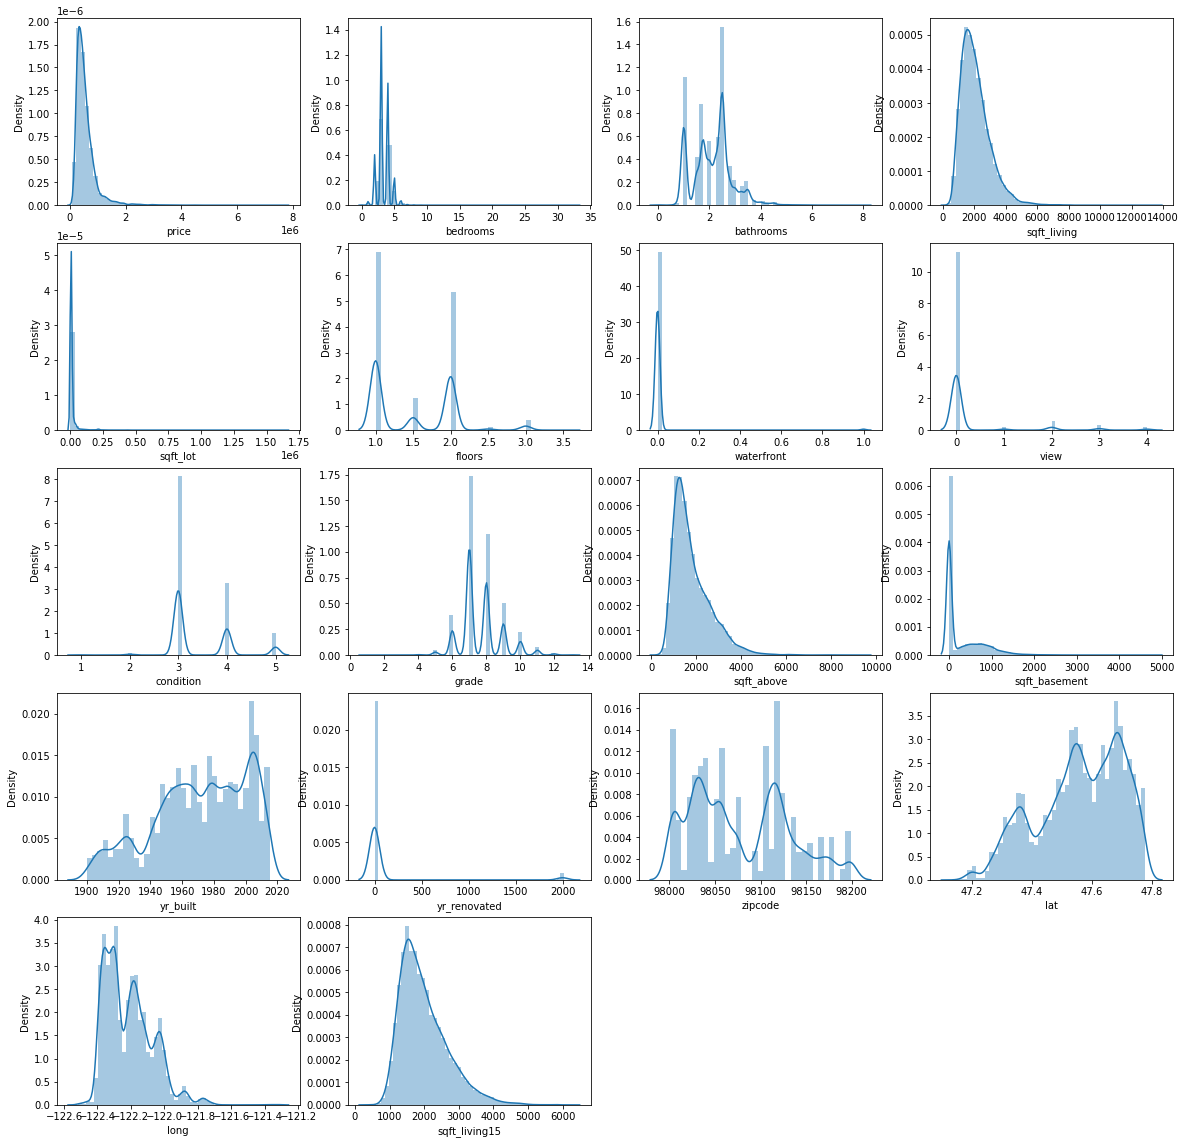

In [10]:
plt.figure(figsize=(20,20))

for i in list(range(0,18)):
    x = 451
    plt.subplot( 5, 4, 1+i )
    sb.distplot( df.iloc[:, i+2] )    

## 기술통계량 및 왜도, 첨도 확인

- Kline(2005)은 왜도의 기준을 절대값 3을 초과하지 않고, 첨도는 절대값 8또는 10을 초과하지 않으면 정규분포로 볼 수 있다고 제시함

In [8]:
# Kline(2005)은 왜도의 기준을 절대값 3을 초과하지 않고, 첨도는 절대값 8또는 10을 초과하지 않으면 정규분포로 볼 수 있다고 제시함

# 왜도
print('왜도', df['price'].skew() )
print()

# 첨도
print('첨도', df['price'].kurtosis() )
print()

왜도 4.024069144684712

첨도 34.58554043194243



## 데이터 기술통계량 확인

In [9]:
# 중간값, 결측치, 왜도, 첨도 표시
df_stats = df.describe().T

skew_results = []
kurtosis_results = []
null_results = []
median_results = []

for idx, val in enumerate(df_stats.index):
    median_results.append(df[val].median())
    skew_results.append(df[val].skew())
    kurtosis_results.append(df[val].kurtosis())
    null_results.append(df[val].isnull().sum())  

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results


pd.options.display.float_format = '{:.3f}'.format

display( df_stats )

pd.reset_option('display.float_format')

,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
id,21613.000,4580301520.865,2876565571.312,1000102.000,2123049194.000,3904930410.000,7308900445.000,9900000190.000,3904930410.000,0,0.243,-1.261
price,21613.000,540088.142,367127.196,75000.000,321950.000,450000.000,645000.000,7700000.000,450000.000,0,4.024,34.586
bedrooms,21613.000,3.371,0.930,0.000,3.000,3.000,4.000,33.000,3.000,0,1.974,49.064
bathrooms,21613.000,2.115,0.770,0.000,1.750,2.250,2.500,8.000,2.250,0,0.511,1.280
sqft_living,21613.000,2079.900,918.441,290.000,1427.000,1910.000,2550.000,13540.000,1910.000,0,1.472,5.243
sqft_lot,21613.000,15106.968,41420.512,520.000,5040.000,7618.000,10688.000,1651359.000,7618.000,0,13.060,285.078
floors,21613.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500,1.500,0,0.616,-0.485
waterfront,21613.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000,0.000,0,11.385,127.632
view,21613.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000,0.000,0,3.396,10.893
condition,21613.000,3.409,0.651,1.000,3.000,3.000,4.000,5.000,3.000,0,1.033,0.526
